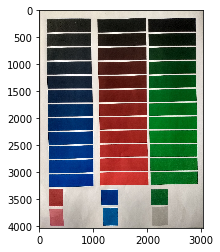

In [4]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline

 
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", help = "path to the image file")
# args = vars(ap.parse_args())
 
# load the image
image = cv2.imread('./a.jpg')

# cv2.imshow('image',image)
# cv2.waitKey(0)
img2 = image[:,:,::-1]
plt.imshow(img2)

In [ ]:
img = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)

cv2.rectangle(img,(15,25),(200,150),(0,0,255),15)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
#image = cv2.imread(args["image"])
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])
 
# blur the resized image slightly, then convert it to both
# grayscale and the L*a*b* color spaces
blurred = cv2.GaussianBlur(resized, (5, 5), 0)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB)
thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]
 
# find contours in the thresholded image
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if imutils.is_cv2() else contours[1]

In [ ]:
i = 1
boundingBoxes = [cv2.boundingRect(c) for c in contours]
(cnts, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),
    key=lambda b:b[1][i], reverse=False))

In [ ]:
print boundingBoxes

In [ ]:
# for (i, c) in enumerate(cnts):
#     #cv2.drawContours(image, c, i,3)
#     cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
#     cv2.imshow("Image", image)
#     cv2.waitKey(0)

In [ ]:
index = 1
for c in contours:
    print index
    index +=1
    rect = cv2.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100: continue
    #print cv2.contourArea(c)
    x,y,w,h = rect
    print image[x:x+w,y+h]
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    #print image
    #cv2.putText(im,'Moth Detected',(x+w+10,y+h),0,0.3,(0,255,0))
# cv2.imshow("Show",im)
# cv2.waitKey()  
# cv2.destroyAllWindows()